In [31]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

#Version manual del codigo donde el control esta limitado de 0 a 1

#Se crea la función
#D carga con los parametros constantes, P con las variables, t significa tiempo
def DPdt(P,t):
    
    #Le doy sus valores a los parametros; son 17,en orden:
    D = (1, 0.1, 0.01, 0.4, 0.7,0.1, 0.05, 0.02, 0.5, 0.1, 0.3, 0.3, 0.05, 0.45, 0.001, 0.01, 0.01)
    #Los ultimos o son arbitrarios o provienen de la investigación referenciada en el paper:Romero-Leiton J. and Ibargüen-Mondragón E., “Stability analysis and optimal control intervention strategies of a malaria mathematical model”, Appl. Sci., 21 (2019), 184–218.

    
    # 1/ Recrutamiento de personas, 2/ Ratio de perdida de inmunidad natural de humanos, 3/ Tasa de muerte natural de humanos,
    # 4/ Probabilidad de trasmisión mosquito-a-humano, 5/ Eficacia de la droga, 6/ Ratio de adquisición de resistencia,
    # 7/ Ratio de recuperación espontanea, 8/Muerte por infección. 9/ Recrutamiento de mosquitos,
    # 10/ Muerte natural de mosquitos, 11/ Probabilidad de infección humano-a-mosquito,12/ Eficacia de insecticida,
    # 13/ Resistencia a los insecticidas, 14/ Tasa de mordeduras per capita, 15/ Costo por Infectados,
    # 16/ Costo de drogas, 17/ Costo de insecticidas
    Lambda_h, omega, mu_h, beta_h, xi1, q1, delta, rho, Lambda_v, mu_v, beta_v, xi2, q2,epsilon,C,d1,d2 = D
    
    #Aclaro los nombres de las variables
    Sh, Ih, Rh, Sv, Iv,lambda_1,lambda_2,lambda_3,lambda_4,lambda_5 = P
    Nh = Sh + Ih + Rh
    Nv = Sv + Iv
    
    #Defino las ecuaciones de las variables originales
    DSh_dt = Lambda_h + omega * Rh - beta_h * epsilon * Iv / Nh * Sh - mu_h * Sh
    DIh_dt = beta_h * epsilon * Iv / Nh * Sh - xi1 * (min ( max (xi1*(1-q1)*Ih*(lambda_2-lambda_3)/d1 , 0) , 1 )) * (1 - q1) * Ih - (delta + rho + mu_h) * Ih
    #DIh_dt = beta_h * epsilon * Iv / Nh * Sh - xi1 * theta_1 * (1 - q1) * Ih - (delta + rho + mu_h) * Ih
    DRh_dt = xi1 * (1 - q1) * (min ( max (xi1*(1-q1)*Ih*(lambda_2-lambda_3)/d1 , 0) , 1 )) * Ih + delta * Ih - (omega + mu_h) * Rh
    #DRh_dt = xi1 * (1 - q1) * theta_1 * Ih + delta * Ih - (omega + mu_h) * Rh
    DSv_dt = Lambda_v - beta_v * epsilon * Ih / Nh * Sv - xi2 * (1 - q2) * (min ( max (xi2*(1-q2)*(lambda_4*Sv-lambda_5*Iv)/d2 , 0) , 1 )) * Sv - mu_v * Sv
    #DSv_dt = Lambda_v - beta_v * epsilon * Ih / Nh * Sv - xi2 * (1 - q2) * theta_2 * Sv - mu_v * Sv
    DIv_dt = beta_v * epsilon * Ih / Nh * Sv - xi2 * (1 - q2) * (min ( max (xi2*(1-q2)*(lambda_4*Sv-lambda_5*Iv)/d2 , 0) , 1 )) * Iv - mu_v * Iv
    #DIv_dt = beta_v * epsilon * Ih / Nh * Sv - xi2 * (1 - q2) * theta_2 * Iv - mu_v * Iv
    #Las ecuaciones que gobiernan las variables de holgura
    Dlambda_1_Dt = - ((Sh * beta_h * epsilon * Iv * (Ih - Rh)*(lambda_2 - lambda_1)) / (Nh*Nh)) + lambda_1 * mu_h + (Sv * beta_v * epsilon * Ih*(lambda_5 - lambda_4) / (Nh * Nh))
    Dlambda_2_Dt = - C - xi1 * (min ( max (xi1*(1-q1)*Ih*(lambda_2-lambda_3)/d1 , 0) , 1 )) * (1-q1) * (lambda_3 - lambda_2) + lambda_2 * mu_h - delta * (lambda_3 - lambda_2) + Sh*beta_h*epsilon*Iv/(Nh**2) - (Sv*beta_v*epsilon*(Sh+Rh)*(lambda_5-lambda_4)/(Nh**2))
    #Dlambda_2_Dt = - C - xi1 * theta_1 * (1-q1) * (lambda_3 - lambda_2) + lambda_2 * mu_h - delta * (lambda_3 - lambda_2) + Sh*beta_h*epsilon*Iv/(Nh**2) - (Sv*beta_v*epsilon*(Sh+Rh)*(lambda_5-lambda_4)/(Nh**2))
    #sospecho que el último termino es realmente positivo o el penultmo negativo
    Dlambda_3_Dt =  - omega*lambda_1 + mu_h*lambda_3 + (Sh*beta_h*epsilon*Iv*(lambda_2-lambda_1)/(Nh**2)) + (Sv*beta_v*epsilon*Ih*(lambda_5-lambda_4)/(Nh**2))
    
    Dlambda_4_Dt = - (lambda_4*beta_v*epsilon*Ih/Nh) + lambda_4*xi2*(min ( max (xi2*(1-q2)*(lambda_4*Sv-lambda_5*Iv)/d2 , 0) , 1 ))*(1-q2) + lambda_4*mu_v
    #Dlambda_4_Dt = - (lambda_4*beta_v*epsilon*Ih/Nh) + lambda_4*xi2*theta_2*(1-q2) + lambda_4*mu_v
    Dlambda_5_Dt = - C - (Sh*beta_h*epsilon*(lambda_2-lambda_1)/Nh) + lambda_5*xi2*(min ( max (xi2*(1-q2)*(lambda_4*Sv-lambda_5*Iv)/d2 , 0) , 1 ))*(1-q2)+lambda_5 * mu_v
    #Dlambda_5_Dt = - C - (Sh*beta_h*epsilon*(lambda_2-lambda_1)/Nh) + lambda_5*xi2*theta_2*(1-q2)+lambda_5 * mu_v
    #Como deberia ser los controles según el principio de Pontryagin y los limites de 0 a 1
    #Dtheta_1_Dt = 0
    #Dtheta_2_Dt = 0
    #Dtheta_1_Dt = min ( max (xi1*(1-q1)*Ih*(lambda_2-lambda_3)/d1 , 0) , 1 )
    #Dtheta_2_Dt = min ( max (xi2*(1-q2)*(lambda_4*Sv-lambda_5*Iv)/d2 , 0) , 1 )
    
    S = [max(0, DSh_dt), max(0, DIh_dt), max(0, DRh_dt), max(0, DSv_dt), max(0, DIv_dt),
         max(0, Dlambda_1_Dt), max(0, Dlambda_2_Dt), max(0, Dlambda_3_Dt), max(0, Dlambda_4_Dt), max(0, Dlambda_5_Dt),]  # Theta_1 and theta_2 are non-negative by definition
    
    #La solución
    
    return S


#En este punto creo los parametros iniciales 
#Los de los estados se basan en los usados en el paper para areas rurales
Sh_0 = 100000
Ih_0 = 30000
Rh_0 = 20000
Sv_0 = 50000
Iv_0 = 10000
#Ya que los controles no tienen condiciones limite finales las adjuntas inician en 0
lambda_1_0 = 0
lambda_2_0 = 0
lambda_3_0 = 0
lambda_4_0 = 0
lambda_5_0 = 0
#Por el contexto se asume que tasa de recuperación por la droga comienza perfecta


P0 = [Sh_0,Ih_0,Rh_0,Sv_0,Iv_0,lambda_1_0,lambda_2_0,lambda_3_0,lambda_4_0,lambda_5_0]

#Determino los valores que va a seguir y hasa donde, en este caso se hara hasta 100
Timestamp = np.linspace(0,10, 50)

Sol = odeint(DPdt, P0, Timestamp, full_output = True)


In [33]:
Y1=Sol[0]


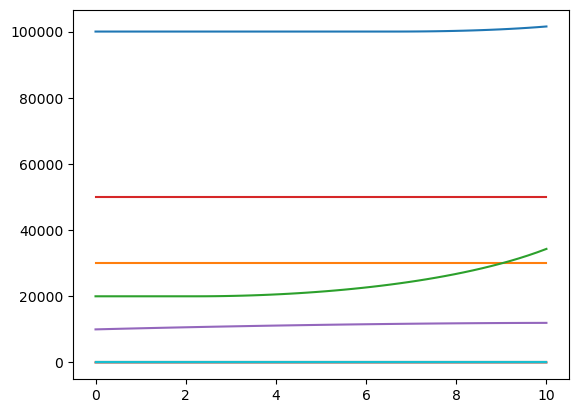

In [35]:
plt.plot(Timestamp,Y1)